In [1]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import numpy as np

In [2]:
data=yf.download(["AAPL","MSFT","GOOGL"],period="6mo")[["Adj Close"]]


*********************100%***********************]  3 of 3 completed

In [4]:
data.columns = data.columns.get_level_values(1)
data["AAPL"]=data["AAPL"].pct_change()

In [5]:
data["MSFT"]=data["MSFT"].pct_change()
data["GOOGL"]=data["GOOGL"].pct_change()

In [6]:
data.head()

Ticker,AAPL,GOOGL,MSFT
Date,,,
2024-06-14,NaN,NaN,NaN
2024-06-17,0.019672,0.002545,0.013105
2024-06-18,-0.010985,-0.012131,-0.004527
2024-06-20,-0.021513,0.006911,-0.001434
2024-06-21,-0.010444,0.018888,0.009154


In [7]:
data["AAPLR"]=(1+data["AAPL"]).cumprod()
data["MSFTR"]=(1+data["MSFT"]).cumprod()
data["GOOGLR"]=(1+data["GOOGL"]).cumprod()

In [8]:
data

Ticker,AAPL,GOOGL,MSFT,AAPLR,MSFTR,GOOGLR
Date,,,,,,
2024-06-14,NaN,NaN,NaN,NaN,NaN,NaN
2024-06-17,0.019672,0.002545,0.013105,1.019672,1.013105,1.002545
2024-06-18,-0.010985,-0.012131,-0.004527,1.008471,1.008518,0.990384
2024-06-20,-0.021513,0.006911,-0.001434,0.986776,1.007072,0.997228
2024-06-21,-0.010444,0.018888,0.009154,0.976470,1.016291,1.016064
...,...,...,...,...,...,...
2024-12-09,0.016101,0.004928,0.005523,1.163854,1.011633,0.994423
2024-12-10,0.004134,0.055882,-0.006031,1.168665,1.005531,1.049993
2024-12-11,-0.005166,0.055247,0.012767,1.162628,1.018369,1.108001


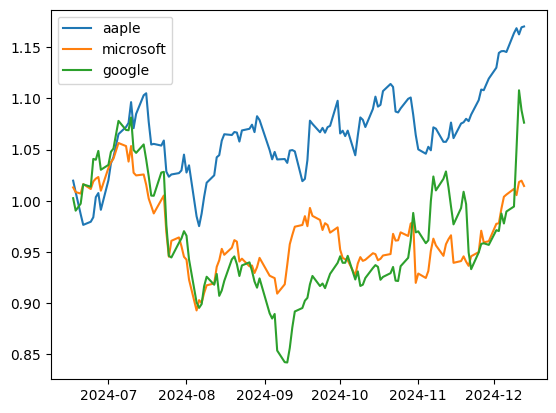

In [10]:
plt.plot(data["AAPLR"],label="aaple")
plt.plot(data["MSFTR"],label="microsoft")
plt.plot(data["GOOGLR"],label="google")
plt.xlabel="year"
plt.ylabel="return"
plt.legend()
plt.show()

In [12]:
data["AAPLRS"]=data["AAPLR"]*3333.33
data["MSFTRS"]=data["MSFTR"]*3333.33
data["GOOGLRS"]=data["GOOGLR"]*3333.33

In [13]:
data

Ticker,AAPL,GOOGL,MSFT,AAPLR,MSFTR,GOOGLR,AAPLRS,MSFTRS,GOOGLRS
Date,,,,,,,,,
2024-06-14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-06-17,0.019672,0.002545,0.013105,1.019672,1.013105,1.002545,3398.901634,3377.014083,3341.814806
2024-06-18,-0.010985,-0.012131,-0.004527,1.008471,1.008518,0.990384,3361.566373,3361.724781,3301.276703
2024-06-20,-0.021513,0.006911,-0.001434,0.986776,1.007072,0.997228,3289.249562,3356.904449,3324.090995
2024-06-21,-0.010444,0.018888,0.009154,0.976470,1.016291,1.016064,3254.895124,3387.633949,3386.877524
...,...,...,...,...,...,...,...,...,...
2024-12-09,0.016101,0.004928,0.005523,1.163854,1.011633,0.994423,3879.510381,3372.105614,3314.738355
2024-12-10,0.004134,0.055882,-0.006031,1.168665,1.005531,1.049993,3895.547330,3351.768023,3499.972129
2024-12-11,-0.005166,0.055247,0.012767,1.162628,1.018369,1.108001,3875.422635,3394.560119,3693.333366


In [19]:
tickers=["AAPL","GOOGL","MSFT"]
ndata=data[tickers]

In [20]:
ndata.head()

Ticker,AAPL,GOOGL,MSFT
Date,,,
2024-06-14,NaN,NaN,NaN
2024-06-17,0.019672,0.002545,0.013105
2024-06-18,-0.010985,-0.012131,-0.004527
2024-06-20,-0.021513,0.006911,-0.001434
2024-06-21,-0.010444,0.018888,0.009154


In [23]:
weights=np.array([0.3,0.3,0.3])
portfolio_1 = ndata.dot(weights)

In [24]:
portfolio_1.head()

Date
2024-06-14         NaN
2024-06-17    0.010597
2024-06-18   -0.008293
2024-06-20   -0.004811
2024-06-21    0.005279
dtype: float64

In [25]:
portfolioreturn=(1+portfolio_1).cumprod()

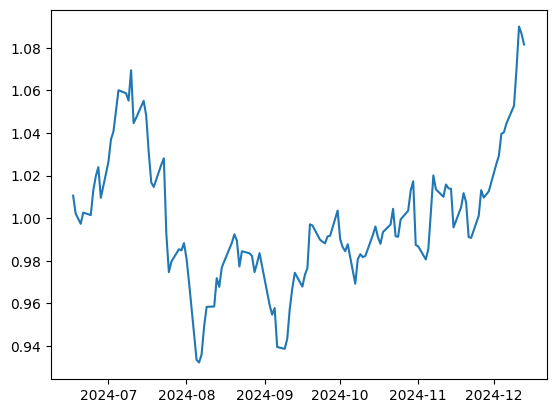

In [26]:
plt.plot(portfolioreturn)

In [27]:
print("TOTAL PORTFOLIO VALUE =",portfolioreturn["2024-12-13"]

Date
2024-06-14         NaN
2024-06-17    1.010597
2024-06-18    1.002216
2024-06-20    0.997395
2024-06-21    1.002660
                ...   
2024-12-09    1.052812
2024-12-10    1.069862
2024-12-11    1.090034
2024-12-12    1.086642
2024-12-13    1.081571
Length: 127, dtype: float64